In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'F:/machine learning/lab 2/dataset/best_model.keras'

In [3]:
train_dir = r'F:\machine learning\lab 2\dataset\computer_vision\train'
validation_dir = r'F:\machine learning\lab 2\dataset\computer_vision\validation'
test_dir = r'F:\machine learning\lab 2\dataset\computer_vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [15]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [17]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=1,
                    callbacks=callbacks)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4096 - loss: 1.2429
Epoch 1: val_loss improved from inf to 0.66275, saving model to F:/machine learning/lab 2/dataset/best_model.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - acc: 0.4120 - loss: 1.2389 - val_acc: 0.6786 - val_loss: 0.6627


In [28]:
model_history.history

{'acc': [0.5318750143051147],
 'loss': [1.0428187847137451],
 'val_acc': [0.6785714030265808],
 'val_loss': [0.6627490520477295]}

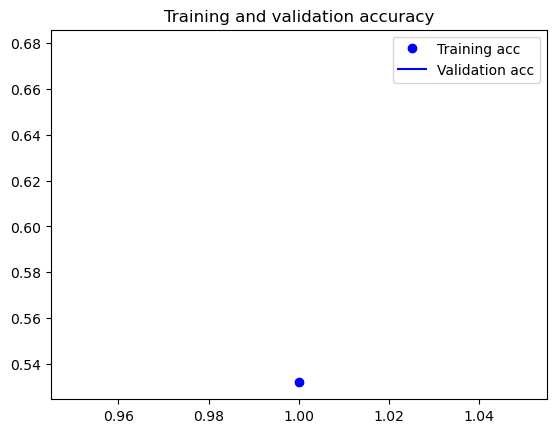

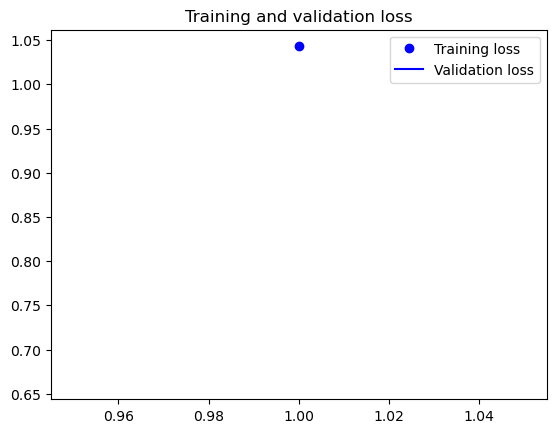

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Administrator\\Downloads\\ML Lab\\Computer vision\\lab11\\model_Accuracy.png'

<Figure size 640x480 with 0 Axes>

In [30]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

In [40]:
model.save(r'F:\machine learning\lab 2\lab_12\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step


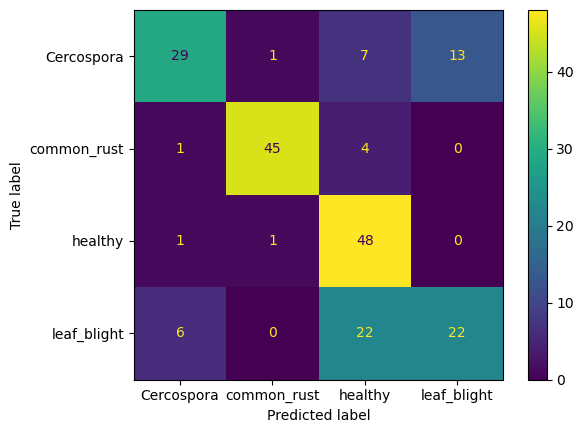

In [42]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [43]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.78      0.58      0.67        50
 common_rust       0.96      0.90      0.93        50
     healthy       0.59      0.96      0.73        50
 leaf_blight       0.63      0.44      0.52        50

    accuracy                           0.72       200
   macro avg       0.74      0.72      0.71       200
weighted avg       0.74      0.72      0.71       200

